In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
dataframe= tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle=True,
image_size=(256,256),
batch_size=32)

Found 20638 files belonging to 15 classes.


In [4]:
class_names=dataframe.class_names

In [5]:
for image_batch,label_batch in dataframe.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[ 8 10  7  9  7  7  6 14  1  1  1  2  7  1 10 12  8  5 12 10  9 12  2  9
  2 12 11  1  1  9 10  1]


In [6]:
image_size=256
batch_size=32
channels=3

In [1]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataframe.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])

NameError: name 'plt' is not defined

In [8]:
Training and Testing
80% ==> Training
20% ==> 10% => Test, 10% => validation

SyntaxError: invalid syntax (736236609.py, line 2)

In [7]:
len(dataframe)

645

In [8]:
train_size=len(dataframe)*0.8
print(train_size)

516.0


In [9]:
train_ds=dataframe.take(54)
print(len(train_ds))

54


In [10]:
test_ds=dataframe.skip(54)
print(len(test_ds))

591


In [11]:
len(test_ds)*0.5

295.5

In [12]:
val_ds=test_ds.take(7)
len(val_ds)

7

In [13]:
test_ds=test_ds.skip(7)
len(test_ds)

584

In [14]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
data_aug=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
input_shape = (batch_size, image_size, image_size, 3)
n_classes = 3

model = models.Sequential([
    resize_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [20]:
train_history=model.fit(
    train_ds,
    epochs=20,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "D:\Study\Projects\plant-disease-classification\env\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "D:\Study\Projects\plant-disease-classification\env\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "D:\Study\Projects\plant-disease-classification\env\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "D:\Study\Projects\plant-disease-classification\env\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "D:\Study\Projects\plant-disease-classification\env\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\kshit\AppData\Local\Temp\ipykernel_8828\389577985.py", line 1, in <module>
      train_history=model.fit(
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "D:\Study\Projects\plant-disease-classification\env\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 14 which is outside the valid range of [0, 3).  Label values: 0 8 11 1 9 14 10 5 2 11 7 14 5 5 5 3 12 12 14 9 7 14 5 9 8 7 1 14 5 14 5 2
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1424]

In [1]:
model.evaluate(test_ds)

NameError: name 'model' is not defined

In [23]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [2]:
from tensorflow.keras.models import load_model
model2=load_model(f"../models/{1}")

first image
actual label  Potato___Early_blight
1/1 [==============================] - 0s 427ms/step
Predicted label Potato___Early_blight


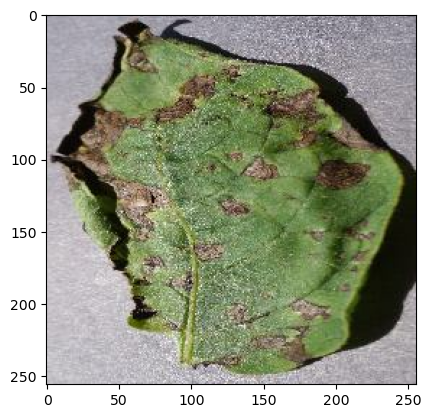

In [31]:
import numpy as np
for image_batches,labels_batch in test_ds.take(1):
    f_image=image_batches[0].numpy().astype('uint8')
    f_label=labels_batch[0].numpy()
    print("first image")
    plt.imshow(f_image)
    print("actual label ",class_names[f_label])
    pred=model2.predict(image_batches)
    print("Predicted label "+class_names[np.argmax(pred[0])])

In [32]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    pred=model2.predict(img_array)
    pred_label= class_names[np.argmax(pred[0])]
    confidence= round(100*(np.argmax(pred[0])),2)
    return pred_label,confidence

1/1 [==============================] - 0s 29ms/step


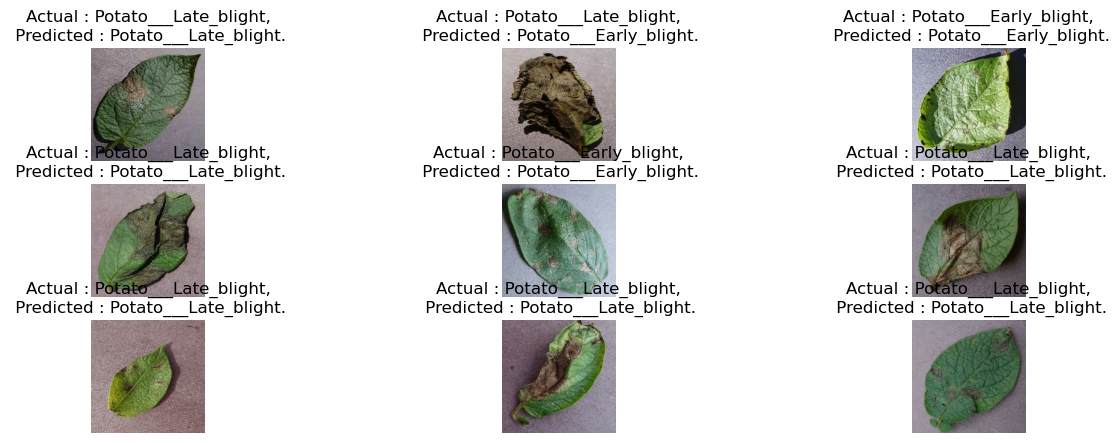

In [34]:
plt.figure(figsize=(15,5))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        pred_label,conf=predict(model2,images[i].numpy())
        act_label=class_names[labels[i]]
        plt.title(f"Actual : {act_label},\n Predicted : {pred_label}.")
        
        plt.axis('off')

In [3]:
model2.save("../model.h5")